<a href="https://colab.research.google.com/github/nano2547/PS-Research/blob/main/HW06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 2316 - Fall 2023 - HW06 Data Visualization
# HW06: This homework is due by Sunday, October 22nd @ 11:59PM.

You are required to complete the missing bodies of the functions below.
Further instructions are provided in the comments ...
# A few tips:
   - Make sure you return the right value and datatype
   - <b>Pay attention to capitalization and small details. They matter.</b>
   - Test your code for each function by uncommenting the respective test cases in the if __name__ == '__main__' block
   - Do not import modules within functions
   - Do not leave any print statements within your functions
   - Submit in Canvas as HW06.ipynb  - Your submission should be named exactly HW06.ipynb
   - <b>All outputs should be displayed before you submit. We will noy run your code to see the output.</b>
   - Print your variables as you code in order to see what values they have
   - <b> TAs are NOT allowed to provide ANY help with the extra credit assignment. This should be done entirely on your own. </b>

## HW06 Problem Setup:
    You are in your first data science class in college. Your professor selects the most original dataset in the
    world to dissect, the Titanic data set.

    For these visualization, we strongly recommend you use plotly express, which is imported below.
    You may chose to use seaborn or matplotlib,
    but for the visualizations asked of you, it will be simpler to stick with plotly express.
    
    The following questions will walk you through the process of loading, cleaning,
    and transforming data to generate analysis points and visualizations.
    
    Note: There is NOT a specific library you have to use. All libraries covered in the Data Visualization handout
    have been imported in the cell below. This assignment will not have an autograder configured. Instead, visual
    guides for the output you should be generating are displayed under each question cell.
    
## Extra Credit Opportunity:
    The final cell in this assignment gives you an opportunity to create an extra credit function.
    In order to receive a bonus 5pts, create a function that creates another visual with the given data frame.
    This visual must be significantly more advanced than the questions within this homework. If you simply submit a plain bar chart, box plot, histogram, scatterplot, pie chart, or trendline- you will not receive full credit.
    
    You are allowed to use any of the libraries we have discussed, and we recommend you peruse the documentation
    for the matplotlib, seaborn, and plotly.express libraries. Try to make your visual interactive, engaging, and
    draw a clear analysis. A 1-2 sentence description of your visual, describing the analysis point generated from
    the visual, is necessary to receive any credit!

# Run the below before starting the homework...

In [181]:
import pandas as pd
import plotly.express as px

# Q1

To first understand your dataset, read in the cleaned csv file, passed in as paramter `file`.

Given a file name input (str), return a pandas DataFrame. Ensure that the index column is correctly set to PassengerId.

**Input:**

    file: str

**Returns:**

    survivor_data: Pandas DataFrame

# **Expected Output**:
### Size: 891 Rows

# ![Q1.PNG](Q1.png)

In [182]:
#### Write your code here####
def load_data(file):
  df = pd.read_csv(file)
  df = df.set_index('PassengerId')
  return df


In [183]:
####Test Case####
""" Run this cell before completing any of the other problems. This dataset is used as input."""
survivor_data = load_data("train.csv")
survivor_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# Q2

You have a hypothesis that the passenger class is strongly correlated to fare rates.
Produce a visual with a box plot per each passenger class, mapping the distribution of ticket fare to passenger classes.
Ensure you are displaying **all** points, have correctly colored each box plot by passenger class, and have accurately formated and labled your axis.


**Input:**

    survivor_data: Pd DataFrame of Book Data

**Returns:**

    None: When function is run, bar graph is displayed

**Expected Output**:
![Q22.png](Q22.png)

In [184]:
def passenger_fare_distributions(survivor_data):
  fig = px.box(survivor_data, x="Pclass", y = "Fare", points = "all", title = "Fare By Class Distributions", color = "Pclass", labels = {'Pclass':'Passenger Class'})
  fig.update_yaxes(tickformat= '$.2f')
  fig.show()


In [185]:
survivor_data = load_data("train.csv")
passenger_fare_distributions(survivor_data)

# Q3

You want to demonstrate survival rates by age. To do so, construct a histogram with 2 distributions: 1 to represent passengers who died, and one to represent passengers who survived.
Ensure you are updating the histogram legend, and including a marginal with a violin distribution representation


**Input:**

    survivor_data: Pd DataFrame of Book Data

**Returns:**

    None: When function is run, bar graph is displayed

**Expected Output**:
![Q3.png](Q3.png)

In [186]:
from matplotlib import legend
def age_of_survivors(survivor_data):
    fig = px.histogram(survivor_data, x='Age', color = 'Survived', marginal = 'violin')
    custom_legend_labels = {'0': 'Died', '1': 'Survived'}
    fig.for_each_trace(lambda trace: trace.update(name=custom_legend_labels[trace.name]))
    fig.show()

In [187]:
survivor_data = load_data("train.csv")
age_of_survivors(survivor_data)

# Q4

The function, `most_likely_to(survivor_data)`, should search for 3D relationship between Age, Passenger class, and Fare. Accomplish this with a 3D scatter plot. You need to specify the following parameters for the scatter plot:

The x-axis should represent passengers' ages.
The y-axis should represent passenger class.
The z-axis should represent the fares paid by passengers.
The color of each point should correspond to the survival status (survived or not).
The size of the points should be determined by the fares paid.
Use an opacity of 0.7 to enhance the visibility of the data points.

Note the expected output for all title and axis labels.

**Input:**

   `survivor_data: Pd DataFrame of Titanic Data`

**Returns:**

    None: When function is run, scatterplot is displayed
    
**Expected Output**:
![Q44.png](Q44.png)

In [188]:
def most_likely_to(survivor_data):
    fig = px.scatter_3d(survivor_data, x='Age', y = 'Pclass', z='Fare',color='Survived',opacity=0.7,size='Fare')
    fig.show()

In [189]:
####Test Case####
""" Run this cell before completing any of the other problems. This dataset is used as input."""
survivor_data = load_data("train.csv")
most_likely_to(survivor_data)

# Q5

The function, `survival_rates(survivor_data)`, will visualize the relationships between passenger class and gender in terms of survival rates on the Titanic.

Generate a grouped bar chart that accomplishes the following:

The x-axis of the chart should represent passenger class (Pclass).
The y-axis should show the survival rate, i.e., the proportion of passengers who survived.
The bars should be color-coded by gender (male and female).

Ensure you customize the labels, legend, and title to match the expected output.
Additionally, for each bar, include the exact survival rate as text on the chart, displayed outside the bars.

**Hint**: Research the text template parameter for the plotly express bar graph.

**Input:**

   `survivor_data: Pd DataFrame of Titanic Data`

**Returns:**

    None: When function is run, scatterplot is displayed
    
**Expected Output**:
![Q5.png](Q5.png)

In [190]:
def family_relations(survivor_data):
  grouped = survivor_data.groupby(['Sex','Pclass'])
  mean_values =grouped['Survived'].mean()
  data={'Survival Rate': [i for i in mean_values],'Passenger Class': [1,2,3,1,2,3], 'Gender':['female','female','female','male','male','male']}
  df= pd.DataFrame(data)
  df['SRate'] = (df['Survival Rate']*100).map('{:.6f}%'.format)
  fig = px.bar(df,x = 'Passenger Class',y='Survival Rate', color = 'Gender', title='Survival Rate on the Titanic by Passenger Class and Gender', text='SRate')
  fig.update_traces(textposition='outside')
  fig.show()

In [191]:
####Test Case####
""" Run this cell before completing any of the other problems. This dataset is used as input."""
survivor_data = load_data("train.csv")
family_relations(survivor_data)

# Extra Credit

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt


In [193]:
def your_function(survivor_data):
    plt.figure(figsize=(10,6))
    sns.violinplot(x='Pclass', y='Age', data=survivor_data, palette='Set2', inner='quart')
    plt.title('Distribution of Age by Passenger Class')
    plt.xlabel('Passenger Class')
    plt.ylabel('Age')
    plt.show()

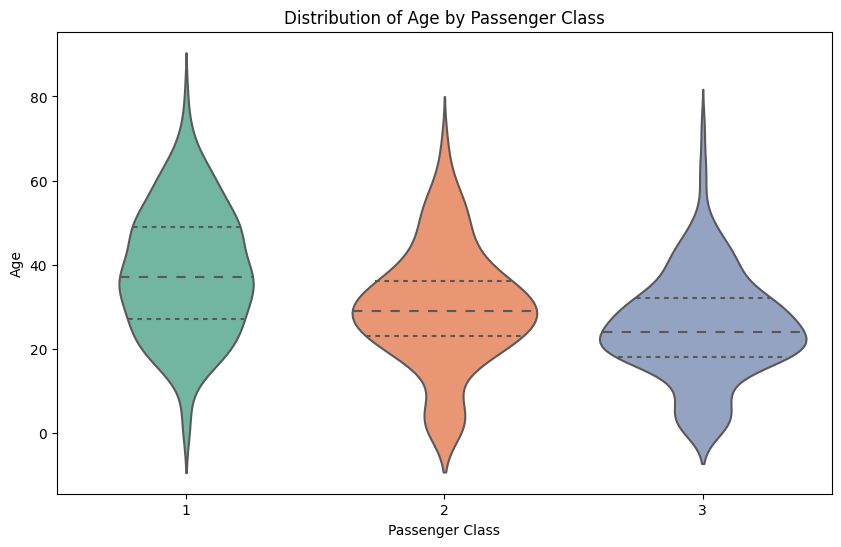

In [194]:
###Test Case###
survivor_data = load_data('train.csv')
your_function(survivor_data)

#Analysis


The violin plot illustrates the distribution of passenger ages across different classes on the Titanic. It allows us to analyze how age is spread among passengers in each class, revealing that 1st class passengers tend to be older, while 3rd class passengers have a wider age range with a concentration of younger individuals.




